# Project #2: How to run
 
### 1. Clone this repository:
```
git clone https://github.com/rehmsu-maker/Project-3.git
```
### 2. install required libraries
```
pip install -r requirements.txt
```
### Run the jupyter file:
```
jupyter notebook main.ipynb
```

In [16]:

# Reproducibility & environment info
import sys, platform, sklearn, numpy as np, pandas as pd, matplotlib
from datetime import datetime

SEED = 42
np.random.seed(SEED)

print("Timestamp:", datetime.utcnow().isoformat() + "Z")
print("Python  :", sys.version.split()[0])
print("OS      :", platform.platform())
print("NumPy   :", np.__version__)
print("Pandas  :", pd.__version__)
print("sklearn :", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)


Timestamp: 2025-09-13T16:44:04.038636Z
Python  : 3.13.7
OS      : macOS-15.6.1-arm64-arm-64bit-Mach-O
NumPy   : 2.3.2
Pandas  : 2.3.2
sklearn : 1.7.1
Matplotlib: 3.10.6


/var/folders/td/70phhhfx7455gqjmm5ktxt640000gn/T/ipykernel_69704/1031728841.py:8: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  print("Timestamp:", datetime.utcnow().isoformat() + "Z")


In [17]:

# === Config ===
from pathlib import Path

DATA_PATHS = {
    "corn": Path("./corn_features.csv"),        # replace if needed
    "soy":  Path("./soybean_county.csv"),       # replace if needed
}

REPORTS_DIR = Path("./reports")
REPORTS_DIR.mkdir(exist_ok=True)

RANDOM_STATE = 42

# === Plotting (matplotlib only, single chart per cell, no styles/colors explicitly) ===
import matplotlib.pyplot as plt

def save_fig(name: str):
    p = REPORTS_DIR / f"{name}.png"
    plt.tight_layout()
    plt.savefig(p, dpi=150, bbox_inches="tight")
    print(f"Saved figure: {p}")


In [18]:

# === Load Data ===
import pandas as pd

def load_or_fail(path: Path, expected_min_rows=3000):
    if not path.exists():
        raise FileNotFoundError(f"Data file not found: {path}. Please add it next to this notebook or update DATA_PATHS.")
    df = pd.read_csv(path)
    if len(df) < expected_min_rows:
        raise ValueError(f"{path.name} has only {len(df)} rows; assignment requires >= 3000.")
    return df

corn_df = load_or_fail(DATA_PATHS["corn"], expected_min_rows=3000)
soy_df  = load_or_fail(DATA_PATHS["soy"],  expected_min_rows=3000)

corn_df.head(), soy_df.head()


(   year state_alpha state_name county_name  Value  unit_desc  \
 0  2011          AL    ALABAMA     AUTAUGA  111.1  BU / ACRE   
 1  2013          AL    ALABAMA     AUTAUGA   99.3  BU / ACRE   
 2  2017          AL    ALABAMA     AUTAUGA  170.8  BU / ACRE   
 3  2018          AL    ALABAMA     AUTAUGA  165.6  BU / ACRE   
 4  2019          AL    ALABAMA     AUTAUGA  165.3  BU / ACRE   
 
                                    short_desc  Crop  HighYield  StateAvgYield  \
 0  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  Corn          0      96.811628   
 1  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  Corn          0     128.102000   
 2  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  Corn          1     153.136585   
 3  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  Corn          1     147.197059   
 4  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE  Corn          1     135.788571   
 
    RelYield  PrevYearYield  YoYChange  
 0  1.147589      147.28013  -36.18013  
 1  0.775164      111.10000  -11

## Data Description

This section documents the origin, structure, and quirks of the data and surfaces summary statistics and missingness.

- **Corn dataset (`corn_features.csv`)**  
  Expected columns (per user description):  
  `year, state_alpha, state_name, county_name, Value, unit_desc, short_desc, Crop, HighYield, StateAvgYield, RelYield, PrevYearYield, YoYChange`

- **Soybean dataset (`soybean_county.csv`)**  
  Selected columns (per user description; many categorical): includes `Value`, `year`, `state_alpha`, `state_name`, `county_name`, and numerous descriptors.

We will:
1. Show dataset shapes, types, and non-null counts.
2. Visualize basic distributions for `Value` and `year`.
3. Quantify missingness.
4. Note columns with no variance or extreme sparsity (near-empty columns in soybeans).



=== CORN ===
(24298, 13)
year               int64
state_alpha       object
state_name        object
county_name       object
Value            float64
unit_desc         object
short_desc        object
Crop              object
HighYield          int64
StateAvgYield    float64
RelYield         float64
PrevYearYield    float64
YoYChange        float64
dtype: object
year             24298
state_alpha      24298
state_name       24298
county_name      24298
Value            24298
unit_desc        24298
short_desc       24298
Crop             24298
HighYield        24298
StateAvgYield    24298
RelYield         24298
PrevYearYield    24298
YoYChange        24298
dtype: int64

Missing % (top 20):
year             0.0
state_alpha      0.0
state_name       0.0
county_name      0.0
Value            0.0
unit_desc        0.0
short_desc       0.0
Crop             0.0
HighYield        0.0
StateAvgYield    0.0
RelYield         0.0
PrevYearYield    0.0
YoYChange        0.0
dtype: float64
=== SOY ===
(21

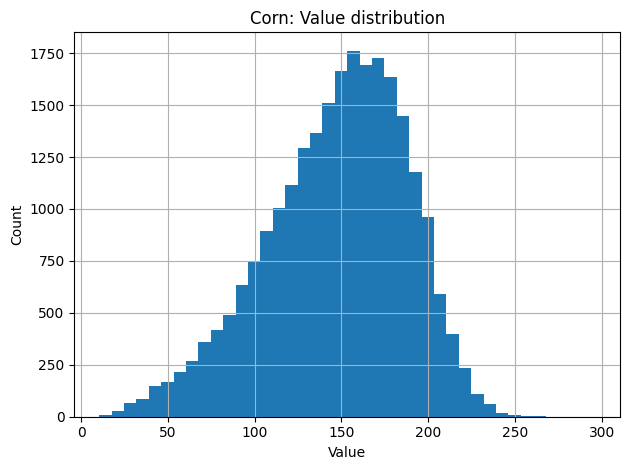

Saved figure: reports/soy_value_hist.png


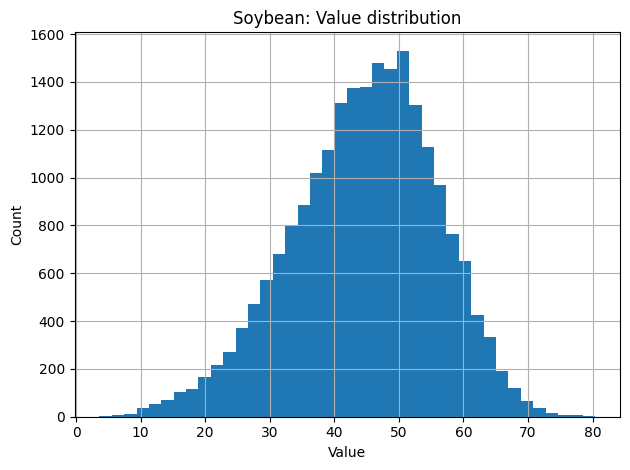

Saved figure: reports/corn_year_counts.png


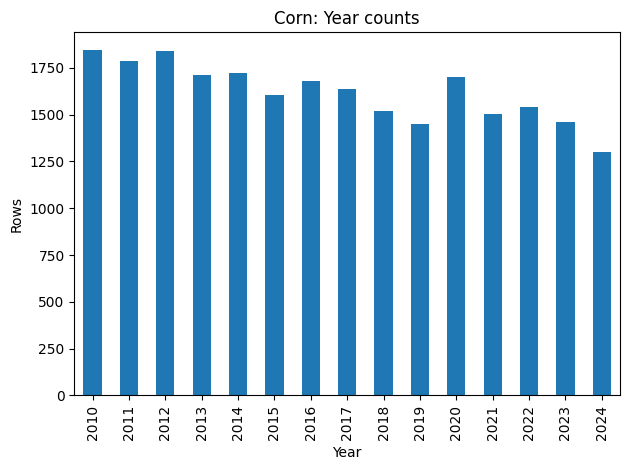

Saved figure: reports/soy_year_counts.png


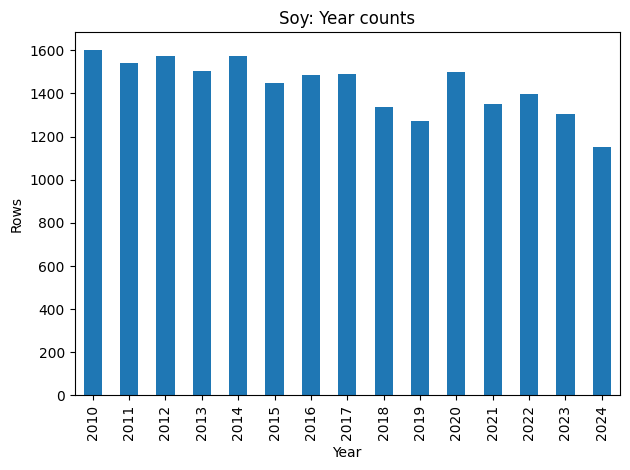

In [19]:

# Basic structure & missingness
def describe_dataset(name, df):
    print(f"=== {name} ===")
    print(df.shape)
    print(df.dtypes)
    print(df.count().sort_values())
    print("\nMissing % (top 20):")
    miss = df.isna().mean().sort_values(ascending=False)*100
    print(miss.head(20).round(2))
    return miss

corn_missing = describe_dataset("CORN", corn_df)
soy_missing  = describe_dataset("SOY", soy_df)

# Simple distributions
fig = plt.figure()
corn_df["Value"].hist(bins=40)
plt.title("Corn: Value distribution")
plt.xlabel("Value")
plt.ylabel("Count")
save_fig("corn_value_hist")
plt.show()

fig = plt.figure()
soy_df["Value"].hist(bins=40)
plt.title("Soybean: Value distribution")
plt.xlabel("Value")
plt.ylabel("Count")
save_fig("soy_value_hist")
plt.show()

# Year distributions
fig = plt.figure()
corn_df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Corn: Year counts")
plt.xlabel("Year")
plt.ylabel("Rows")
save_fig("corn_year_counts")
plt.show()

fig = plt.figure()
soy_df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Soy: Year counts")
plt.xlabel("Year")
plt.ylabel("Rows")
save_fig("soy_year_counts")
plt.show()


## Preprocessing & Feature Engineering

We will perform the following for each dataset:

- **Target definition**
  - **Corn:** Use provided `HighYield` (0/1).
  - **Soy:** Construct `HighYieldSoy` as 1 if county's `Value` is in the top quartile within its `(state_alpha, year)` group, else 0. This creates a clearly defined label without leaking future data across states/years.

- **Cleaning & Imputation**
  - Drop columns with (near) 0% non-null (e.g., `region_desc`, `week_ending`, `watershed_desc`, `zip_5`, etc. in soy).
  - Impute numeric with median; categorical with most frequent.

- **Encoding & Scaling**
  - One-Hot for low-cardinality categoricals; **FeatureHasher** for high-cardinality categoricals to a fixed dimension (enables **cross-domain generalization** by producing a shared feature space).
  - Scale numeric features with `StandardScaler` (for LR/SVM), keep raw for Naive Bayes as a variant.

- **New Features (≥3 each)**
  - **Corn examples:**
    1. `RelToStateAvg = Value / (StateAvgYield + 1e-6)`
    2. `LagDiff = Value - PrevYearYield` (if `PrevYearYield` exists)
    3. `YearTrend = year - year.min()` (proxy for long-term productivity trends)
  - **Soy examples:**
    1. `StateYearZ = (Value - group_median) / (group_iqr + 1e-6)` within `(state_alpha, year)`
    2. `LogValue = log1p(Value)`
    3. `YearTrend = year - year.min()`

We will capture both a **classic tabular pipeline** (OneHot for small categoricals) and a **hashed pipeline** (for cross-domain tests).

In [20]:

import numpy as np
import pandas as pd

# ---- Helper: make soy target by state/year percentile ----
def add_soy_target(df, value_col="Value", by=("state_alpha","year"), q=0.75):
    grp = df.groupby(list(by))[value_col]
    thresh = grp.transform(lambda s: s.quantile(q))
    return (df[value_col] >= thresh).astype(int)

soy_df = soy_df.copy()
soy_df["HighYieldSoy"] = add_soy_target(soy_df)

# ---- Corn extra features ----
corn_df = corn_df.copy()
# Safety for zero division
corn_df["RelToStateAvg"] = corn_df["Value"] / (corn_df["StateAvgYield"].replace(0, np.nan) + 1e-6)
corn_df["LagDiff"] = corn_df["Value"] - corn_df.get("PrevYearYield", pd.Series([np.nan]*len(corn_df)))
corn_df["YearTrend"] = corn_df["year"] - corn_df["year"].min()

# ---- Soy extra features ----
soy_df["YearTrend"] = soy_df["year"] - soy_df["year"].min()
# Group-wise robust z-score: use median and IQR
g = soy_df.groupby(["state_alpha","year"])["Value"]
med = g.transform("median")
iqr = g.transform(lambda s: (s.quantile(0.75) - s.quantile(0.25)))
soy_df["StateYearZ"] = (soy_df["Value"] - med) / (iqr + 1e-6)
soy_df["LogValue"] = np.log1p(soy_df["Value"])

print("Corn engineered columns:", [c for c in corn_df.columns if c not in ['year','state_alpha','state_name','county_name','Value','unit_desc','short_desc','Crop','HighYield','StateAvgYield','RelYield','PrevYearYield','YoYChange']])
print("Soy engineered columns :", [c for c in soy_df.columns if c not in soy_df.columns[:39]])


Corn engineered columns: ['RelToStateAvg', 'LagDiff', 'YearTrend']
Soy engineered columns : ['HighYieldSoy', 'YearTrend', 'StateYearZ', 'LogValue']


In [21]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import FeatureHasher
from sklearn.pipeline import Pipeline

# Identify columns
def pick_columns_corn(df):
    target = "HighYield"
    num_cols = ["Value","StateAvgYield","RelYield","PrevYearYield","YoYChange","RelToStateAvg","LagDiff","YearTrend"]
    cat_low  = ["state_alpha","state_name","county_name","unit_desc","short_desc","Crop"]
    return target, num_cols, cat_low

def pick_columns_soy(df):
    target = "HighYieldSoy"
    # Keep a balanced set of numerical features (some may be int but treated as numeric)
    num_cols = ["Value","CV (%)","year","begin_code","end_code","state_ansi","county_ansi","county_code","state_fips_code",
                "YearTrend","StateYearZ","LogValue"]
    # Many categoricals; choose a subset for one-hot to avoid explosion
    cat_low  = ["state_alpha","state_name","county_name","commodity_desc","unit_desc","agg_level_desc","class_desc","statisticcat_desc","domain_desc","freq_desc","short_desc","source_desc","sector_desc","group_desc","prodn_practice_desc","util_practice_desc"]
    # Filter existence
    num_cols  = [c for c in num_cols if c in df.columns]
    cat_low   = [c for c in cat_low if c in df.columns]
    return target, num_cols, cat_low

# Classic (OneHot for low cardinality; drop high-card columns if any)
def make_classic_pipeline(num_cols, cat_cols, scale=True):
    num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median"))])
    if scale:
        num_pipe.steps.append(("scaler", StandardScaler()))
    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", min_frequency=20))  # collapse rare cats
    ])
    pre = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])
    return pre

# Hashed pipeline (for cross-domain shared space)
def make_hashed_pipeline(n_features=256, scale=True):
    # We will hash *selected categoricals* into a fixed-width sparse representation
    def select_cat(df):
        return df.select_dtypes(include=["object"]).columns.tolist()
    def select_num(df):
        return df.select_dtypes(include=[np.number]).columns.tolist()

    # Custom transformers that take/return dataframes
    from sklearn.base import BaseEstimator, TransformerMixin

    class ColumnSelector(BaseEstimator, TransformerMixin):
        def __init__(self, cols):
            self.cols = cols
        def fit(self, X, y=None):
            # Resolve callable
            if callable(self.cols):
                self._cols = self.cols(X)
            else:
                self._cols = self.cols
            return self
        def transform(self, X):
            return X[self._cols]

    num_pipe = Pipeline([("sel", ColumnSelector(select_num)),
                         ("imp", SimpleImputer(strategy="median"))])
    if scale:
        num_pipe.steps.append(("scaler", StandardScaler(with_mean=False)))  # sparse friendly option

    cat_pipe = Pipeline([("sel", ColumnSelector(select_cat)),
                         ("imp", SimpleImputer(strategy="most_frequent")),
                         ("hash", FeatureHasher(n_features=n_features, input_type="string"))])

    pre = ColumnTransformer([
        ("num", num_pipe, slice(0, None)),   # the selector inside handles columns
        ("cat", cat_pipe, slice(0, None))
    ])
    return pre


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import time

def split_df(df, target_col, test_size=0.2, val_size=0.2, random_state=RANDOM_STATE):
    X = df.drop(columns=[target_col])
    y = df[target_col].astype(int)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size+val_size, stratify=y, random_state=random_state)
    rel = val_size/(test_size+val_size)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1-rel, stratify=y_temp, random_state=random_state)
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

def eval_preds(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0)
    }
    # ROC-AUC if probabilities are valid in (0,1)
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)
    except Exception:
        metrics["roc_auc"] = np.nan
    return metrics, y_pred

def print_cm_and_roc(y_true, y_prob, title_prefix):
    m, y_pred = eval_preds(y_true, y_prob)
    print(title_prefix, m)
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    fig = plt.figure()
    try:
        RocCurveDisplay.from_predictions(y_true, y_prob)
        plt.title(f"{title_prefix} ROC curve")
        save_fig(f"{title_prefix.lower().replace(' ','_')}_roc")
    except Exception as e:
        print("ROC plot failed:", str(e))
    plt.show()


In [23]:

# === Logistic Regression from scratch (GD, momentum, optional L2/L1) ===
import numpy as np

class LogisticScratch:
    def __init__(self, lr=0.1, max_iter=200, tol=1e-6, fit_intercept=True, momentum=0.0, l2=0.0, l1=0.0, verbose=False):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.momentum = momentum
        self.l2 = l2
        self.l1 = l1
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0.0

    @staticmethod
    def _sigmoid(z):
        # stable sigmoid
        pos_mask = (z >= 0)
        neg_mask = ~pos_mask
        out = np.zeros_like(z, dtype=float)
        out[pos_mask] = 1.0/(1.0 + np.exp(-z[pos_mask]))
        expz = np.exp(z[neg_mask])
        out[neg_mask] = expz/(1.0 + expz)
        return out

    def _init_params(self, n_features):
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0
        self._vcoef = np.zeros(n_features)  # momentum accumulators
        self._vint  = 0.0

    def fit(self, X, y):
        # X expected as ndarray (after preprocessing), y as 1D array {0,1}
        n, d = X.shape
        self._init_params(d)

        prev_loss = np.inf
        for it in range(self.max_iter):
            # linear term
            z = X.dot(self.coef_) + (self.intercept_ if self.fit_intercept else 0.0)
            p = self._sigmoid(z)

            # loss (negative log-likelihood + regularization)
            eps = 1e-12
            ll = -(y*np.log(p+eps) + (1-y)*np.log(1-p+eps)).mean()
            l2_term = 0.5*self.l2*np.sum(self.coef_**2)
            l1_term = self.l1*np.sum(np.abs(self.coef_))
            loss = ll + l2_term + l1_term

            # gradient
            grad_w = X.T.dot(p - y)/n + self.l2*self.coef_ + self.l1*np.sign(self.coef_)
            grad_b = (p - y).mean()

            # momentum update
            self._vcoef = self.momentum*self._vcoef + (1-self.momentum)*grad_w
            self._vint  = self.momentum*self._vint  + (1-self.momentum)*grad_b

            # step
            self.coef_ -= self.lr * self._vcoef
            if self.fit_intercept:
                self.intercept_ -= self.lr * self._vint

            if self.verbose and it % 20 == 0:
                print(f"iter {it:4d}: loss={loss:.6f}")

            if abs(prev_loss - loss) < self.tol:
                if self.verbose:
                    print(f"Converged at iter {it}, loss delta={abs(prev_loss-loss):.2e}")
                break
            prev_loss = loss
        return self

    def predict_proba(self, X):
        z = X.dot(self.coef_) + (self.intercept_ if self.fit_intercept else 0.0)
        p = self._sigmoid(z)
        return p

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)



=== Logistic Regression (CORN) | pipeline=classic ===
Scratch LR fit time: 0.33s
CORN Scratch LR (VAL) {'accuracy': 0.9860082304526749, 'precision': 0.9813008130081301, 'recall': 0.9909688013136289, 'f1': 0.9861111111111112, 'roc_auc': 0.9991415551653687}
Confusion Matrix:
 [[2378   46]
 [  22 2414]]
Saved figure: reports/corn_scratch_lr_(val)_roc.png


<Figure size 640x480 with 0 Axes>

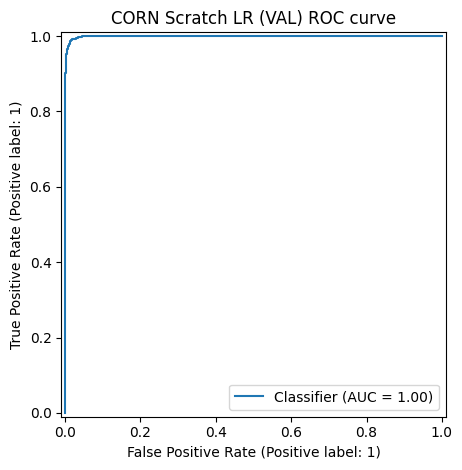

CORN Scratch LR (TEST) {'accuracy': 0.9851851851851852, 'precision': 0.9824418129848917, 'recall': 0.9880903490759754, 'f1': 0.9852579852579852, 'roc_auc': 0.9989581489870657}
Confusion Matrix:
 [[2382   43]
 [  29 2406]]
Saved figure: reports/corn_scratch_lr_(test)_roc.png


<Figure size 640x480 with 0 Axes>

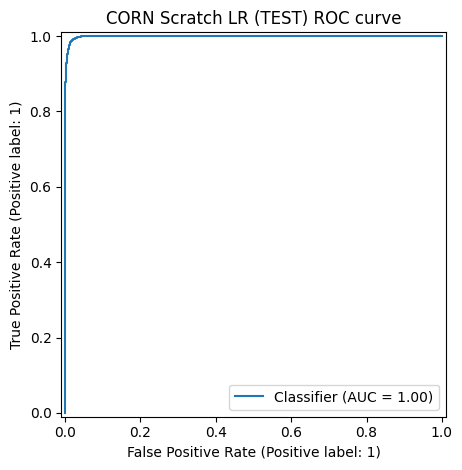

Scratch LR (momentum) fit time: 0.34s
CORN Scratch LR+Momentum (VAL) {'accuracy': 0.9862139917695473, 'precision': 0.9820919820919821, 'recall': 0.9905582922824302, 'f1': 0.9863069691395872, 'roc_auc': 0.9991435873882955}
Confusion Matrix:
 [[2380   44]
 [  23 2413]]
Saved figure: reports/corn_scratch_lr+momentum_(val)_roc.png


<Figure size 640x480 with 0 Axes>

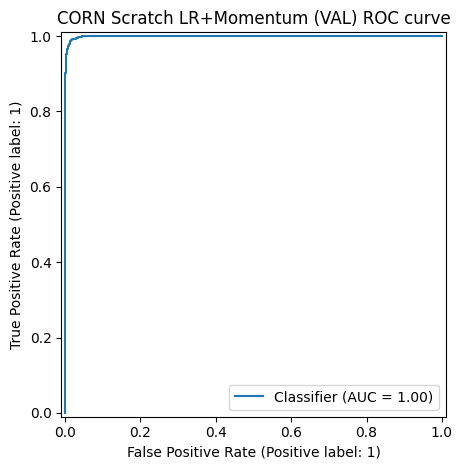

CORN Scratch LR+Momentum (TEST) {'accuracy': 0.98559670781893, 'precision': 0.98324478953821, 'recall': 0.9880903490759754, 'f1': 0.985661614092585, 'roc_auc': 0.9989588263934461}
Confusion Matrix:
 [[2384   41]
 [  29 2406]]
Saved figure: reports/corn_scratch_lr+momentum_(test)_roc.png


<Figure size 640x480 with 0 Axes>

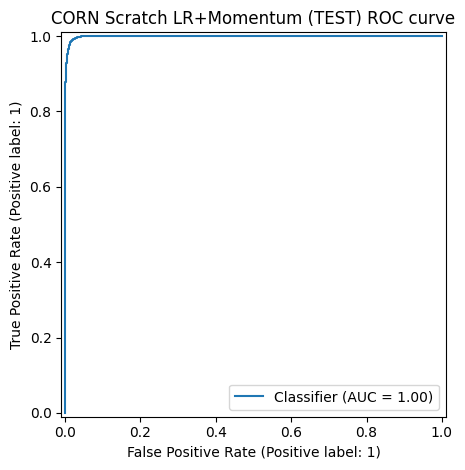

sklearn LR fit time: 0.01s
CORN sklearn LR (VAL) {'accuracy': 0.9973251028806585, 'precision': 0.9975359342915812, 'recall': 0.9971264367816092, 'f1': 0.997331143502361, 'roc_auc': 0.999958000726181}
Confusion Matrix:
 [[2418    6]
 [   7 2429]]
Saved figure: reports/corn_sklearn_lr_(val)_roc.png


<Figure size 640x480 with 0 Axes>

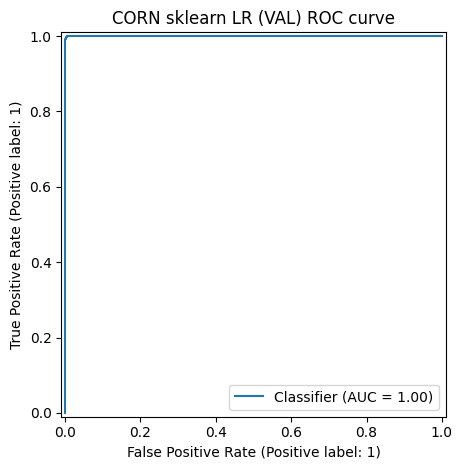

CORN sklearn LR (TEST) {'accuracy': 0.9962962962962963, 'precision': 0.9979398434281005, 'recall': 0.9946611909650924, 'f1': 0.9962978198272316, 'roc_auc': 0.9999519041469971}
Confusion Matrix:
 [[2420    5]
 [  13 2422]]
Saved figure: reports/corn_sklearn_lr_(test)_roc.png


<Figure size 640x480 with 0 Axes>

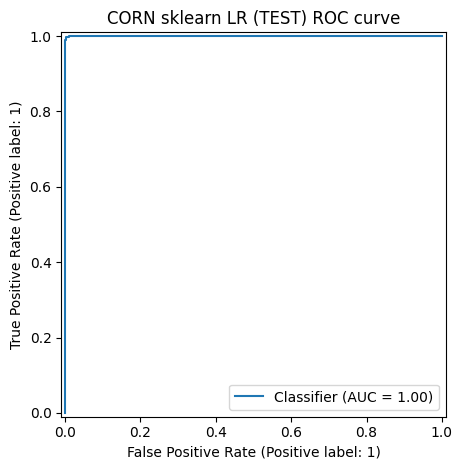


=== Logistic Regression (SOY) | pipeline=classic ===
Scratch LR fit time: 0.23s
SOY Scratch LR (VAL) {'accuracy': 0.9588850174216028, 'precision': 0.9627085377821394, 'recall': 0.8758928571428571, 'f1': 0.9172510518934082, 'roc_auc': 0.9922081744785827}
Confusion Matrix:
 [[3147   38]
 [ 139  981]]
Saved figure: reports/soy_scratch_lr_(val)_roc.png


<Figure size 640x480 with 0 Axes>

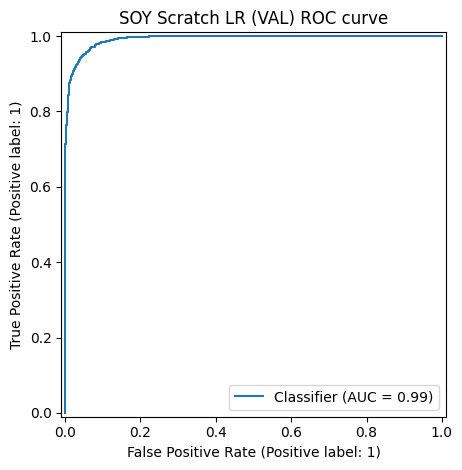

SOY Scratch LR (TEST) {'accuracy': 0.9544821179749187, 'precision': 0.9450867052023122, 'recall': 0.8758928571428571, 'f1': 0.9091751621872104, 'roc_auc': 0.9904817953546767}
Confusion Matrix:
 [[3129   57]
 [ 139  981]]
Saved figure: reports/soy_scratch_lr_(test)_roc.png


<Figure size 640x480 with 0 Axes>

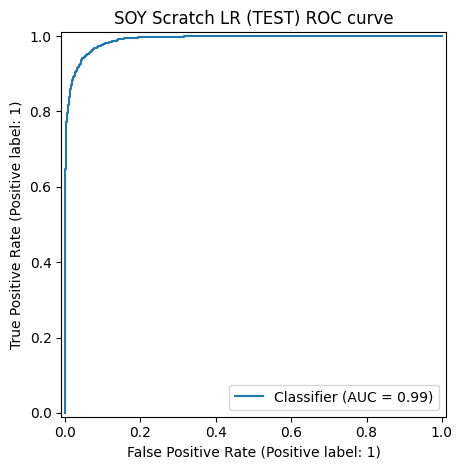

Scratch LR (momentum) fit time: 0.26s
SOY Scratch LR+Momentum (VAL) {'accuracy': 0.9586527293844367, 'precision': 0.961764705882353, 'recall': 0.8758928571428571, 'f1': 0.9168224299065421, 'roc_auc': 0.9922406929804889}
Confusion Matrix:
 [[3146   39]
 [ 139  981]]
Saved figure: reports/soy_scratch_lr+momentum_(val)_roc.png


<Figure size 640x480 with 0 Axes>

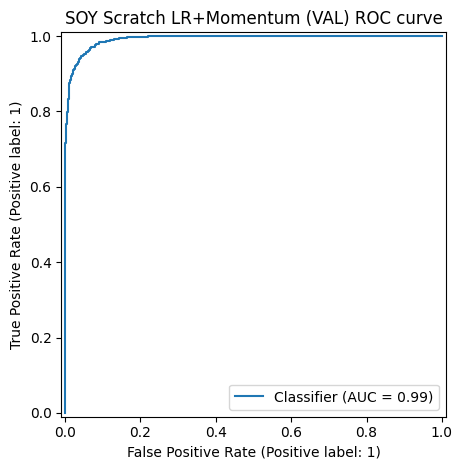

SOY Scratch LR+Momentum (TEST) {'accuracy': 0.9544821179749187, 'precision': 0.9450867052023122, 'recall': 0.8758928571428571, 'f1': 0.9091751621872104, 'roc_auc': 0.9905269146264908}
Confusion Matrix:
 [[3129   57]
 [ 139  981]]
Saved figure: reports/soy_scratch_lr+momentum_(test)_roc.png


<Figure size 640x480 with 0 Axes>

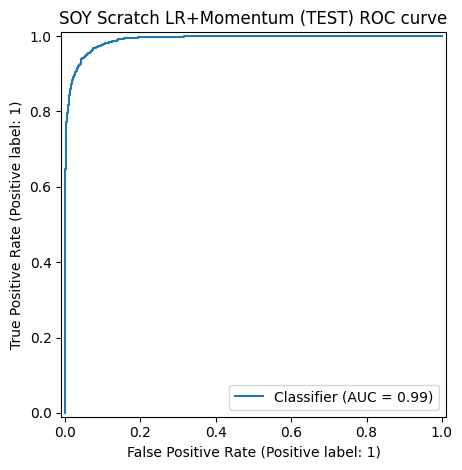

sklearn LR fit time: 0.02s
SOY sklearn LR (VAL) {'accuracy': 0.964924506387921, 'precision': 0.9376693766937669, 'recall': 0.9267857142857143, 'f1': 0.9321957790749887, 'roc_auc': 0.9944987665395828}
Confusion Matrix:
 [[3116   69]
 [  82 1038]]
Saved figure: reports/soy_sklearn_lr_(val)_roc.png


<Figure size 640x480 with 0 Axes>

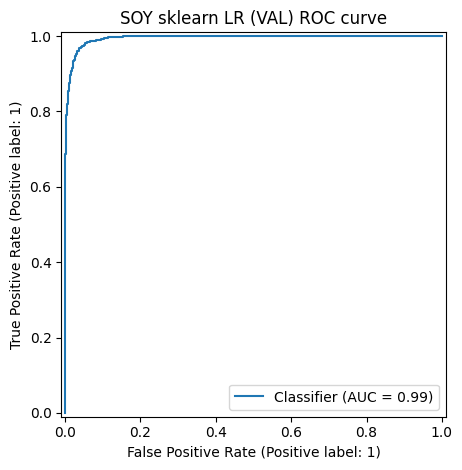

SOY sklearn LR (TEST) {'accuracy': 0.9637714816535068, 'precision': 0.9273049645390071, 'recall': 0.9339285714285714, 'f1': 0.9306049822064056, 'roc_auc': 0.993927954891938}
Confusion Matrix:
 [[3104   82]
 [  74 1046]]
Saved figure: reports/soy_sklearn_lr_(test)_roc.png


<Figure size 640x480 with 0 Axes>

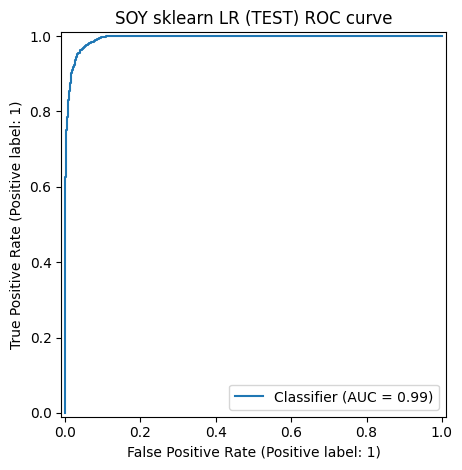

In [24]:

from sklearn.linear_model import LogisticRegression
from scipy import sparse

def run_logistic_block(df, pick_cols_fn, dataset_name, use_hashed=False):
    target, num_cols, cat_cols = pick_cols_fn(df)
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = split_df(df, target)

    if use_hashed:
        pre = make_hashed_pipeline(n_features=256, scale=True)
    else:
        pre = make_classic_pipeline(num_cols, cat_cols, scale=True)

    # Fit transformer on train
    X_train_t = pre.fit_transform(X_train, y_train)
    X_val_t   = pre.transform(X_val)
    X_test_t  = pre.transform(X_test)

    # Convert to dense if small; otherwise keep sparse for sklearn LR
    def to_dense_safe(A):
        if sparse.issparse(A) and A.shape[1] <= 2000:
            return A.toarray()
        return A

    X_train_dense = to_dense_safe(X_train_t)
    X_val_dense   = to_dense_safe(X_val_t)
    X_test_dense  = to_dense_safe(X_test_t)

    print(f"\n=== Logistic Regression ({dataset_name}) | pipeline={'hashed' if use_hashed else 'classic'} ===")

    # Scratch LR baseline
    t0 = time.time()
    lr_s = LogisticScratch(lr=0.1, max_iter=500, tol=1e-7, momentum=0.0, l2=1e-4, l1=0.0, verbose=False)
    lr_s.fit(X_train_dense, y_train.values)
    t1 = time.time()
    print(f"Scratch LR fit time: {t1 - t0:.2f}s")

    val_prob = lr_s.predict_proba(X_val_dense)
    test_prob = lr_s.predict_proba(X_test_dense)
    print_cm_and_roc(y_val, val_prob, f"{dataset_name} Scratch LR (VAL)")
    print_cm_and_roc(y_test, test_prob, f"{dataset_name} Scratch LR (TEST)")

    # Scratch LR with momentum (innovation)
    t0 = time.time()
    lr_m = LogisticScratch(lr=0.1, max_iter=500, tol=1e-7, momentum=0.9, l2=1e-4, l1=0.0, verbose=False)
    lr_m.fit(X_train_dense, y_train.values)
    t1 = time.time()
    print(f"Scratch LR (momentum) fit time: {t1 - t0:.2f}s")
    val_prob_m = lr_m.predict_proba(X_val_dense)
    test_prob_m = lr_m.predict_proba(X_test_dense)
    print_cm_and_roc(y_val, val_prob_m, f"{dataset_name} Scratch LR+Momentum (VAL)")
    print_cm_and_roc(y_test, test_prob_m, f"{dataset_name} Scratch LR+Momentum (TEST)")

    # Sklearn LR
    t0 = time.time()
    lr = LogisticRegression(max_iter=2000, n_jobs=None, solver="lbfgs")
    lr.fit(X_train_t, y_train)
    t1 = time.time()
    print(f"sklearn LR fit time: {t1 - t0:.2f}s")

    val_prob_sk = lr.predict_proba(X_val_t)[:,1]
    test_prob_sk = lr.predict_proba(X_test_t)[:,1]
    print_cm_and_roc(y_val, val_prob_sk, f"{dataset_name} sklearn LR (VAL)")
    print_cm_and_roc(y_test, test_prob_sk, f"{dataset_name} sklearn LR (TEST)")

    # Return preprocessor for downstream reuse (e.g., SVM/NB)
    return pre, (X_train_t, y_train, X_val_t, y_val, X_test_t, y_test)

# Run for Corn (classic)
corn_pre_classic, corn_splits_classic = run_logistic_block(corn_df, pick_columns_corn, "CORN", use_hashed=False)
# Run for Soy (classic)
soy_pre_classic,  soy_splits_classic  = run_logistic_block(soy_df,  pick_columns_soy,  "SOY",  use_hashed=False)


In [25]:

from sklearn.svm import SVC
from itertools import product

def run_svm_grid(X_train, y_train, X_val, y_val, kernel, C_list, param_grid_extra=None):
    # param_grid_extra: e.g., {"gamma":[...]} for RBF
    results = []
    for C in C_list:
        combos = [{}]
        if param_grid_extra:
            keys = list(param_grid_extra.keys())
            vals = list(param_grid_extra.values())
            combos = [dict(zip(keys, v)) for v in product(*vals)]
        for extra in combos:
            params = dict(C=C, kernel=kernel, probability=True, cache_size=500)
            params.update(extra)
            t0 = time.time()
            svm = SVC(**params)
            svm.fit(X_train, y_train)
            train_time = time.time() - t0
            y_prob = svm.predict_proba(X_val)[:,1]
            m, _ = eval_preds(y_val, y_prob)
            n_sv = svm.n_support_.sum() if hasattr(svm, "n_support_") else np.nan
            row = {"kernel": kernel, "C": C, **extra, **m, "train_time": train_time, "n_support_vectors": int(n_sv)}
            results.append(row)
            print("SVM", row)
    return pd.DataFrame(results)

def prepare_splits_for_svm(pre, df, pick_cols_fn):
    target, _, _ = pick_cols_fn(df)
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = split_df(df, target)
    X_train_t = pre.fit_transform(X_train, y_train)
    X_val_t   = pre.transform(X_val)
    X_test_t  = pre.transform(X_test)
    return X_train_t, y_train, X_val_t, y_val, X_test_t, y_test

# Corn SVMs using the same classic preprocessor fitted earlier
Xtr, ytr, Xv, yv, Xte, yte = corn_splits_classic
# Grid search (manual loop to log extra details)
linear_df = run_svm_grid(Xtr, ytr, Xv, yv, kernel="linear", C_list=[0.1, 1, 10, 100])
rbf_df    = run_svm_grid(Xtr, ytr, Xv, yv, kernel="rbf",   C_list=[0.1, 1, 10], param_grid_extra={"gamma":[1e-3, 1e-2, 1e-1]})

linear_df.to_csv(REPORTS_DIR/"corn_svm_linear_grid.csv", index=False)
rbf_df.to_csv(REPORTS_DIR/"corn_svm_rbf_grid.csv", index=False)
print("Saved SVM logs for CORN.")

# Best (by F1 on VAL)
def pick_best(df, metric="f1"):
    return df.sort_values(by=metric, ascending=False).iloc[0].to_dict()

best_lin = pick_best(linear_df)
best_rbf = pick_best(rbf_df)
print("Best linear:", best_lin)
print("Best rbf   :", best_rbf)


SVM {'kernel': 'linear', 'C': 0.1, 'accuracy': 0.9946502057613169, 'precision': 0.9942575881870386, 'recall': 0.9950738916256158, 'f1': 0.9946655724251129, 'roc_auc': 0.9998660426387466, 'train_time': 1.3750147819519043, 'n_support_vectors': 1091}
SVM {'kernel': 'linear', 'C': 1, 'accuracy': 0.9973251028806585, 'precision': 0.996719967199672, 'recall': 0.9979474548440066, 'f1': 0.9973333333333333, 'roc_auc': 0.9999420816465883, 'train_time': 0.8077852725982666, 'n_support_vectors': 549}
SVM {'kernel': 'linear', 'C': 10, 'accuracy': 0.9979423868312757, 'precision': 0.9971311475409836, 'recall': 0.9987684729064039, 'f1': 0.9979491386382281, 'roc_auc': 0.9999792543909563, 'train_time': 0.567004919052124, 'n_support_vectors': 271}
SVM {'kernel': 'linear', 'C': 100, 'accuracy': 0.9987654320987654, 'precision': 0.9991783073130649, 'recall': 0.9983579638752053, 'f1': 0.9987679671457905, 'roc_auc': 0.9999956815262807, 'train_time': 0.8495519161224365, 'n_support_vectors': 135}
SVM {'kernel': '

Saved figure: reports/corn_svm_linear_support_vectors_vs_C.png


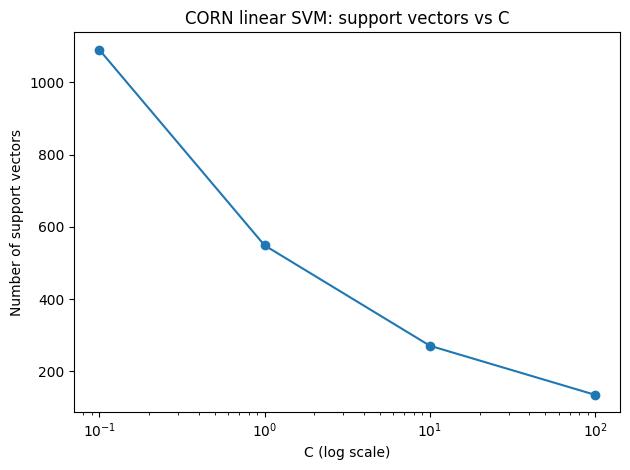

CORN Linear SVM (TEST) {'accuracy': 0.9979423868312757, 'precision': 0.997946611909651, 'recall': 0.997946611909651, 'f1': 0.997946611909651, 'roc_auc': 0.9999904316348779}
Confusion Matrix:
 [[2420    5]
 [   5 2430]]
Saved figure: reports/corn_linear_svm_(test)_roc.png


<Figure size 640x480 with 0 Axes>

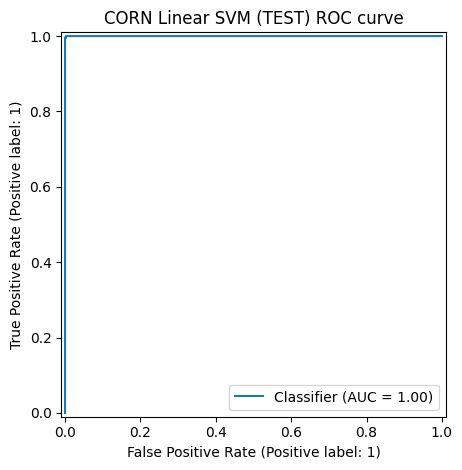

CORN RBF SVM (TEST) {'accuracy': 0.9960905349794239, 'precision': 0.9963023829087921, 'recall': 0.9958932238193019, 'f1': 0.9960977613472992, 'roc_auc': 0.9999307351976121}
Confusion Matrix:
 [[2416    9]
 [  10 2425]]
Saved figure: reports/corn_rbf_svm_(test)_roc.png


<Figure size 640x480 with 0 Axes>

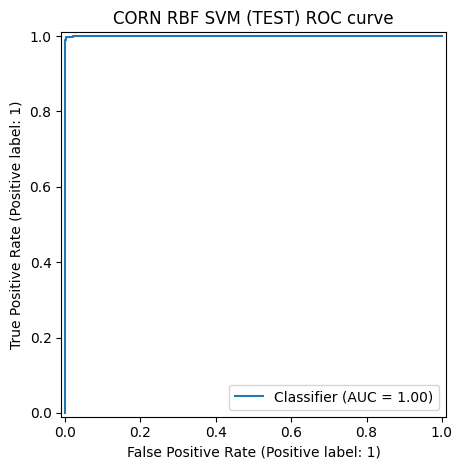

In [26]:

# Plot: number of support vectors vs C (linear)
fig = plt.figure()
tmp = pd.read_csv(REPORTS_DIR/"corn_svm_linear_grid.csv")
plt.plot(tmp["C"], tmp["n_support_vectors"], marker="o")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Number of support vectors")
plt.title("CORN linear SVM: support vectors vs C")
save_fig("corn_svm_linear_support_vectors_vs_C")
plt.show()

# Evaluate best models on TEST
def eval_best_on_test(Xtr, ytr, Xv, yv, Xte, yte, best_lin, best_rbf):
    lin_params = dict(kernel="linear", C=float(best_lin["C"]), probability=True, cache_size=500)
    rbf_params = dict(kernel="rbf", C=float(best_rbf["C"]), gamma=float(best_rbf["gamma"]), probability=True, cache_size=500)
    svm_lin = SVC(**lin_params).fit(Xtr, ytr)
    svm_rbf = SVC(**rbf_params).fit(Xtr, ytr)
    prob_lin = svm_lin.predict_proba(Xte)[:,1]
    prob_rbf = svm_rbf.predict_proba(Xte)[:,1]
    print_cm_and_roc(yte, prob_lin, "CORN Linear SVM (TEST)")
    print_cm_and_roc(yte, prob_rbf, "CORN RBF SVM (TEST)")

eval_best_on_test(Xtr, ytr, Xv, yv, Xte, yte, best_lin, best_rbf)


SVM {'kernel': 'linear', 'C': 0.1, 'accuracy': 0.9660859465737515, 'precision': 0.9371633752244165, 'recall': 0.9321428571428572, 'f1': 0.9346463742166518, 'roc_auc': 0.9945399753307916, 'train_time': 3.134413003921509, 'n_support_vectors': 1520}
SVM {'kernel': 'linear', 'C': 1, 'accuracy': 0.9644599303135889, 'precision': 0.9344115004492363, 'recall': 0.9285714285714286, 'f1': 0.9314823107926556, 'roc_auc': 0.9943578997533079, 'train_time': 2.6384551525115967, 'n_support_vectors': 1118}
SVM {'kernel': 'linear', 'C': 10, 'accuracy': 0.964924506387921, 'precision': 0.9353099730458221, 'recall': 0.9294642857142857, 'f1': 0.9323779668607255, 'roc_auc': 0.9942388988562458, 'train_time': 3.50960111618042, 'n_support_vectors': 1005}
SVM {'kernel': 'linear', 'C': 100, 'accuracy': 0.9642276422764228, 'precision': 0.9343525179856115, 'recall': 0.9276785714285715, 'f1': 0.9310035842293907, 'roc_auc': 0.9942181542946849, 'train_time': 9.934647798538208, 'n_support_vectors': 989}
SVM {'kernel': 'r

<Figure size 640x480 with 0 Axes>

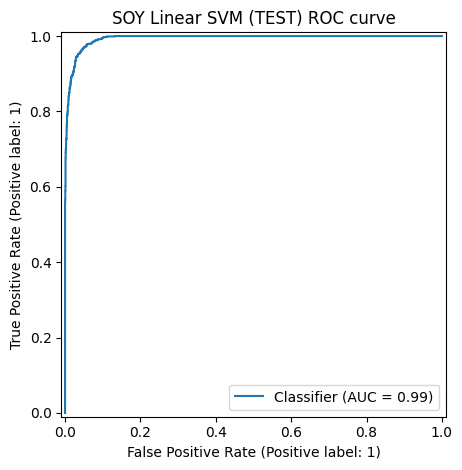

SOY RBF SVM (TEST) {'accuracy': 0.9616813748258244, 'precision': 0.9244444444444444, 'recall': 0.9285714285714286, 'f1': 0.9265033407572383, 'roc_auc': 0.9940490202672405}
Confusion Matrix:
 [[3101   85]
 [  80 1040]]
Saved figure: reports/soy_rbf_svm_(test)_roc.png


<Figure size 640x480 with 0 Axes>

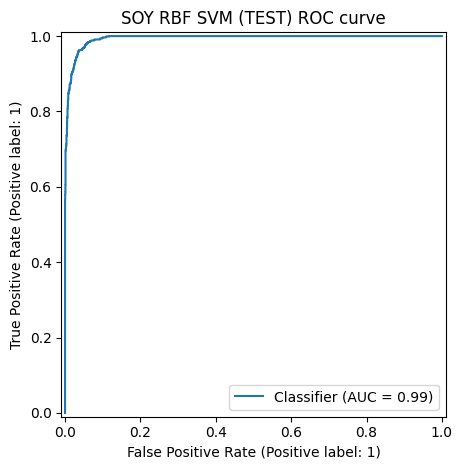

In [27]:

# Soy SVMs (classic)
Xtr, ytr, Xv, yv, Xte, yte = soy_splits_classic
linear_df_soy = run_svm_grid(Xtr, ytr, Xv, yv, kernel="linear", C_list=[0.1, 1, 10, 100])
rbf_df_soy    = run_svm_grid(Xtr, ytr, Xv, yv, kernel="rbf",   C_list=[0.1, 1, 10], param_grid_extra={"gamma":[1e-3, 1e-2, 1e-1]})

linear_df_soy.to_csv(REPORTS_DIR/"soy_svm_linear_grid.csv", index=False)
rbf_df_soy.to_csv(REPORTS_DIR/"soy_svm_rbf_grid.csv", index=False)
print("Saved SVM logs for SOY.")

best_lin_soy = pick_best(linear_df_soy)
best_rbf_soy = pick_best(rbf_df_soy)
print("Best linear SOY:", best_lin_soy)
print("Best rbf SOY   :", best_rbf_soy)

# Evaluate on test
def eval_best_on_test_soy(Xtr, ytr, Xv, yv, Xte, yte, best_lin, best_rbf):
    lin_params = dict(kernel="linear", C=float(best_lin["C"]), probability=True, cache_size=500)
    rbf_params = dict(kernel="rbf", C=float(best_rbf["C"]), gamma=float(best_rbf["gamma"]), probability=True, cache_size=500)
    svm_lin = SVC(**lin_params).fit(Xtr, ytr)
    svm_rbf = SVC(**rbf_params).fit(Xtr, ytr)
    prob_lin = svm_lin.predict_proba(Xte)[:,1]
    prob_rbf = svm_rbf.predict_proba(Xte)[:,1]
    print_cm_and_roc(yte, prob_lin, "SOY Linear SVM (TEST)")
    print_cm_and_roc(yte, prob_rbf, "SOY RBF SVM (TEST)")

eval_best_on_test_soy(Xtr, ytr, Xv, yv, Xte, yte, best_lin_soy, best_rbf_soy)


GNB {'var_smoothing': 1e-09, 'accuracy': 0.6837448559670782, 'precision': 0.8010716677829873, 'recall': 0.4909688013136289, 'f1': 0.6088063120386867, 'roc_auc': 0.8156246274257968}
GNB {'var_smoothing': 1e-08, 'accuracy': 0.7084362139917696, 'precision': 0.8013010053222945, 'recall': 0.55623973727422, 'f1': 0.6566513205718439, 'roc_auc': 0.8165013622667686}
GNB {'var_smoothing': 1e-07, 'accuracy': 0.7261316872427983, 'precision': 0.7978436657681941, 'recall': 0.6075533661740559, 'f1': 0.689815893731065, 'roc_auc': 0.8192510445625842}
GNB {'var_smoothing': 1e-06, 'accuracy': 0.778395061728395, 'precision': 0.8101323596531265, 'recall': 0.7286535303776683, 'f1': 0.7672357899286795, 'roc_auc': 0.8459406516390555}
Best var_smoothing (CORN): 1e-06
CORN GaussianNB (TEST) {'accuracy': 0.7674897119341564, 'precision': 0.8, 'recall': 0.7145790554414785, 'f1': 0.754880694143167, 'roc_auc': 0.8310794047291432}
Confusion Matrix:
 [[1990  435]
 [ 695 1740]]
Saved figure: reports/corn_gaussiannb_(te

<Figure size 640x480 with 0 Axes>

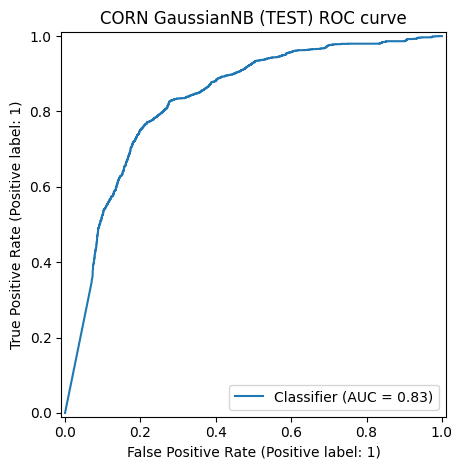

GNB {'var_smoothing': 1e-09, 'accuracy': 0.6492450638792102, 'precision': 0.4103860294117647, 'recall': 0.7973214285714286, 'f1': 0.5418689320388349, 'roc_auc': 0.7488053655528145}
GNB {'var_smoothing': 1e-08, 'accuracy': 0.7344947735191638, 'precision': 0.49327878433664524, 'recall': 0.7535714285714286, 'f1': 0.596255740021194, 'roc_auc': 0.7567018950437319}
GNB {'var_smoothing': 1e-07, 'accuracy': 0.8020905923344948, 'precision': 0.6015151515151516, 'recall': 0.7089285714285715, 'f1': 0.6508196721311476, 'roc_auc': 0.829205118860731}
GNB {'var_smoothing': 1e-06, 'accuracy': 0.8727061556329849, 'precision': 0.7118518518518518, 'recall': 0.8580357142857142, 'f1': 0.7781376518218623, 'roc_auc': 0.9361322605965463}
Best var_smoothing (SOY): 1e-06
SOY GaussianNB (TEST) {'accuracy': 0.8699489084997678, 'precision': 0.7046783625730995, 'recall': 0.8607142857142858, 'f1': 0.77491961414791, 'roc_auc': 0.9324270244821092}
Confusion Matrix:
 [[2782  404]
 [ 156  964]]
Saved figure: reports/soy_

<Figure size 640x480 with 0 Axes>

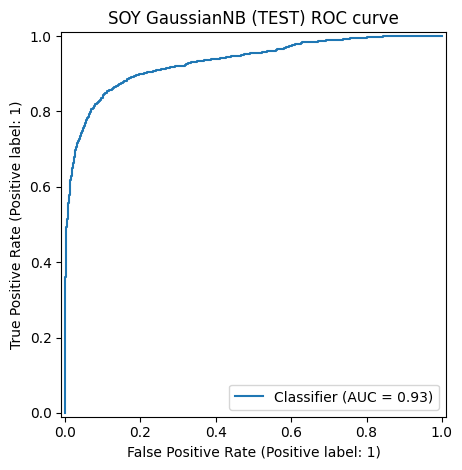

In [28]:

from sklearn.naive_bayes import GaussianNB

def run_gnb_sweep(X_train, y_train, X_val, y_val, var_smoothing_list=[1e-9, 1e-8, 1e-7, 1e-6]):
    results = []
    # Convert to dense for GaussianNB
    Xtr = X_train.toarray() if hasattr(X_train, "toarray") else np.asarray(X_train)
    Xv  = X_val.toarray() if hasattr(X_val, "toarray") else np.asarray(X_val)
    for vs in var_smoothing_list:
        gnb = GaussianNB(var_smoothing=vs)
        gnb.fit(Xtr, y_train)
        prob = gnb.predict_proba(Xv)[:,1]
        m, _ = eval_preds(y_val, prob)
        results.append({"var_smoothing": vs, **m})
        print("GNB", results[-1])
    return pd.DataFrame(results)

# Corn NB (using classic preprocessed features but *without* scaler for a variant)
# Build a "nb-friendly" preprocessor (no scaling)
target_c, num_c, cat_c = pick_columns_corn(corn_df)
pre_nb_corn = make_classic_pipeline(num_c, cat_c, scale=False)
(Xtr_c, ytr_c), (Xv_c, yv_c), (Xte_c, yte_c) = split_df(corn_df, target_c)
Xtr_c_t = pre_nb_corn.fit_transform(Xtr_c, ytr_c)
Xv_c_t  = pre_nb_corn.transform(Xv_c)
Xte_c_t = pre_nb_corn.transform(Xte_c)

gnb_grid_corn = run_gnb_sweep(Xtr_c_t, ytr_c, Xv_c_t, yv_c)
best_vs_corn = gnb_grid_corn.sort_values(by="f1", ascending=False).iloc[0]["var_smoothing"]
print("Best var_smoothing (CORN):", best_vs_corn)

# Evaluate on test
gnb_corn = GaussianNB(var_smoothing=best_vs_corn).fit(
    Xtr_c_t.toarray() if hasattr(Xtr_c_t, "toarray") else np.asarray(Xtr_c_t),
    ytr_c
)
prob_corn = gnb_corn.predict_proba(Xte_c_t.toarray() if hasattr(Xte_c_t, "toarray") else np.asarray(Xte_c_t))[:,1]
print_cm_and_roc(yte_c, prob_corn, "CORN GaussianNB (TEST)")

# Soy NB (similar pipeline)
target_s, num_s, cat_s = pick_columns_soy(soy_df)
pre_nb_soy = make_classic_pipeline(num_s, cat_s, scale=False)
(Xtr_s, ytr_s), (Xv_s, yv_s), (Xte_s, yte_s) = split_df(soy_df, target_s)
Xtr_s_t = pre_nb_soy.fit_transform(Xtr_s, ytr_s)
Xv_s_t  = pre_nb_soy.transform(Xv_s)
Xte_s_t = pre_nb_soy.transform(Xte_s)

gnb_grid_soy = run_gnb_sweep(Xtr_s_t, ytr_s, Xv_s_t, yv_s)
best_vs_soy = gnb_grid_soy.sort_values(by="f1", ascending=False).iloc[0]["var_smoothing"]
print("Best var_smoothing (SOY):", best_vs_soy)

gnb_soy = GaussianNB(var_smoothing=best_vs_soy).fit(
    Xtr_s_t.toarray() if hasattr(Xtr_s_t, "toarray") else np.asarray(Xtr_s_t),
    ytr_s
)
prob_soy = gnb_soy.predict_proba(Xte_s_t.toarray() if hasattr(Xte_s_t, "toarray") else np.asarray(Xte_s_t))[:,1]
print_cm_and_roc(yte_s, prob_soy, "SOY GaussianNB (TEST)")


## Cross-Domain Generalization (A ↔ B)

To compare transfer, we build a **shared feature space** using a hashed pipeline (fixed-width), which maps categorical columns
to a consistent vector across datasets.

- Train on CORN (A), evaluate on SOY (B) after refitting the preprocessor on A and transforming B with the same columns schema.
- Train on SOY (B), evaluate on CORN (A).
- Models compared: Scratch Logistic (with/without momentum), sklearn Logistic, Linear SVM, RBF SVM, and GaussianNB.

We interpret which algorithms transfer best and hypothesize why (e.g., linear separability, reliance on precise category IDs, etc.).

In [29]:
from scipy import sparse
import numpy as np

# Build hashed preprocessors for each dataset, same dimensionality
hash_dim = 512
pre_hash_A = make_hashed_pipeline(n_features=hash_dim, scale=True)
pre_hash_B = make_hashed_pipeline(n_features=hash_dim, scale=True)

# A = CORN, B = SOY
A_df, pickA = corn_df.copy(), pick_columns_corn
B_df, pickB = soy_df.copy(),  pick_columns_soy
tA, _, _ = pickA(A_df)
tB, _, _ = pickB(B_df)

XA = A_df.drop(columns=[tA])
yA = A_df[tA].astype(int)
XB = B_df.drop(columns=[tB])
yB = B_df[tB].astype(int)

# --- KEY FIX: align target/feature columns between domains before transform ---

# Fit on A, transform A and B (align B's columns to A's)
XA_hash = pre_hash_A.fit_transform(XA, yA)
XB_aligned_to_A = XB.reindex(columns=XA.columns, fill_value=np.nan)
XB_hash = pre_hash_A.transform(XB_aligned_to_A)

# Fit on B, transform B and A (align A's columns to B's)
XB_hash_rev = pre_hash_B.fit_transform(XB, yB)
XA_aligned_to_B = XA.reindex(columns=XB.columns, fill_value=np.nan)
XA_hash_rev = pre_hash_B.transform(XA_aligned_to_B)


def train_eval_transfer(X_src, y_src, X_tgt, y_tgt, name):
    logs = []

    # Scratch LR
    Xs = X_src.toarray() if hasattr(X_src, "toarray") else np.asarray(X_src)
    Xt = X_tgt.toarray() if hasattr(X_tgt, "toarray") else np.asarray(X_tgt)

    for label, model in [
        ("LR_scratch", LogisticScratch(lr=0.1, max_iter=500, tol=1e-6, momentum=0.0, l2=1e-4)),
        ("LR_scratch_mom", LogisticScratch(lr=0.1, max_iter=500, tol=1e-6, momentum=0.9, l2=1e-4)),
    ]:
        t0 = time.time()
        model.fit(Xs, y_src.values)
        tr_time = time.time() - t0
        prob = model.predict_proba(Xt)
        m, _ = eval_preds(y_tgt, prob)
        logs.append({"model": label, "train_time": tr_time, **m})

    # sklearn LR (uses sparse fine)
    lr = LogisticRegression(max_iter=2000)
    t0 = time.time()
    lr.fit(X_src, y_src)
    tr_time = time.time() - t0
    prob = lr.predict_proba(X_tgt)[:,1]
    m, _ = eval_preds(y_tgt, prob)
    logs.append({"model": "LR_sklearn", "train_time": tr_time, **m})

    # Linear SVM
    svm_lin = SVC(kernel="linear", C=1.0, probability=True, cache_size=500)
    t0 = time.time()
    svm_lin.fit(X_src, y_src)
    tr_time = time.time() - t0
    prob = svm_lin.predict_proba(X_tgt)[:,1]
    m, _ = eval_preds(y_tgt, prob)
    logs.append({"model": "SVM_linear", "train_time": tr_time, **m, "n_support_vectors": int(svm_lin.n_support_.sum())})

    # RBF SVM (default gamma='scale')
    svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, cache_size=500)
    t0 = time.time()
    svm_rbf.fit(X_src, y_src)
    tr_time = time.time() - t0
    prob = svm_rbf.predict_proba(X_tgt)[:,1]
    m, _ = eval_preds(y_tgt, prob)
    logs.append({"model": "SVM_rbf", "train_time": tr_time, **m, "n_support_vectors": int(svm_rbf.n_support_.sum())})

    # GaussianNB (dense)
    gnb = GaussianNB()
    t0 = time.time()
    gnb.fit(Xs, y_src)
    tr_time = time.time() - t0
    prob = gnb.predict_proba(Xt)[:,1]
    m, _ = eval_preds(y_tgt, prob)
    logs.append({"model": "GaussianNB", "train_time": tr_time, **m})

    df = pd.DataFrame(logs)
    df.to_csv(REPORTS_DIR / f"transfer_{name}.csv", index=False)
    return df

# A->B
transfer_AB = train_eval_transfer(XA_hash, yA, XB_hash, yB, "A_to_B_corn_to_soy")
# B->A
transfer_BA = train_eval_transfer(XB_hash_rev, yB, XA_hash_rev, yA, "B_to_A_soy_to_corn")

transfer_AB, transfer_BA


/Users/shajeelrehman/Documents/School Python/sklearn-env/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/shajeelrehman/Documents/School Python/sklearn-env/lib/python3.13/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['region_desc' 'week_ending' 'watershed_desc' 'zip_5'
 'congr_district_code']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/Users/shajeelrehman/Documents/School Python/sklearn-env/lib/python3.13/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['region_desc' 'week_ending' 'watershed_desc' 'zip_5'
 'congr_district_code']. At least one non-missing value is needed for impu

(            model  train_time  accuracy  precision    recall        f1  \
 0      LR_scratch    0.793496  0.739815   0.000000  0.000000  0.000000   
 1  LR_scratch_mom    0.901342  0.739815   0.000000  0.000000  0.000000   
 2      LR_sklearn    0.416505  0.739815   0.000000  0.000000  0.000000   
 3      SVM_linear    2.988678  0.739815   0.000000  0.000000  0.000000   
 4         SVM_rbf   81.535961  0.739815   0.000000  0.000000  0.000000   
 5      GaussianNB    0.074441  0.303386   0.265442  0.949116  0.414859   
 
     roc_auc  n_support_vectors  
 0  0.671522                NaN  
 1  0.673310                NaN  
 2  0.777475                NaN  
 3  0.500000              770.0  
 4  0.600409            23030.0  
 5  0.514340                NaN  ,
             model  train_time  accuracy  precision    recall        f1  \
 0      LR_scratch    0.816768  0.498889   0.000000  0.000000  0.000000   
 1  LR_scratch_mom    0.849420  0.501111   0.501111  1.000000  0.667654   
 2      L